In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# Data Import

In [2]:
df = pd.read_csv (r"C:\Users\DELL\Desktop\Machine Learning\Wednesday Solutions\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Data Manipulation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 3. Missing Value Identify & Treatment

In [4]:
# count the number of NaN values in each column
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
# Let's look at some statistical information about our dataframe.
df.describe() 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# EDA

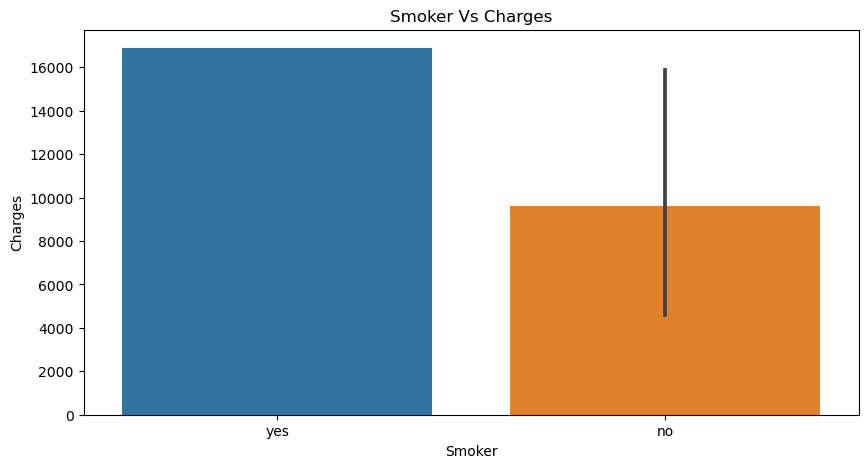

In [6]:
plt.figure(figsize=(10, 5))
host_hist = sns.barplot(x='smoker', y='charges', data=df.head(10))# Create the bar plot
host_hist.set_title('Smoker Vs Charges')# Set plot title and axis labels
host_hist.set_ylabel('Charges')
host_hist.set_xlabel('Smoker')
plt.show()

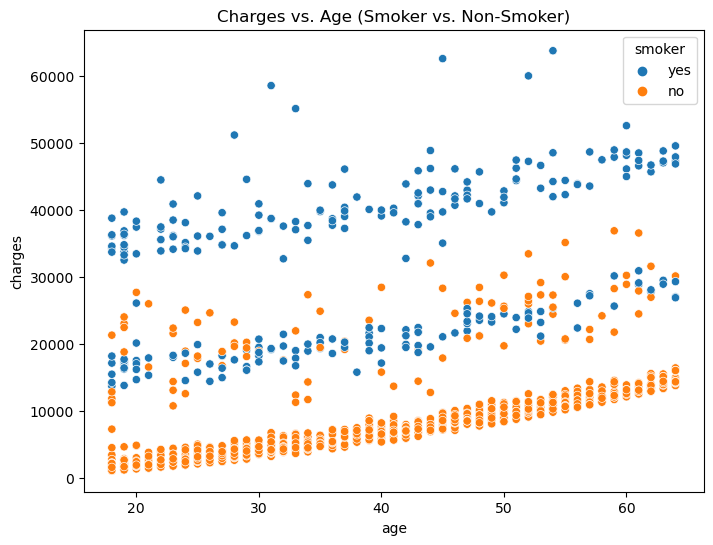

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Charges vs. Age (Smoker vs. Non-Smoker)')
plt.show()

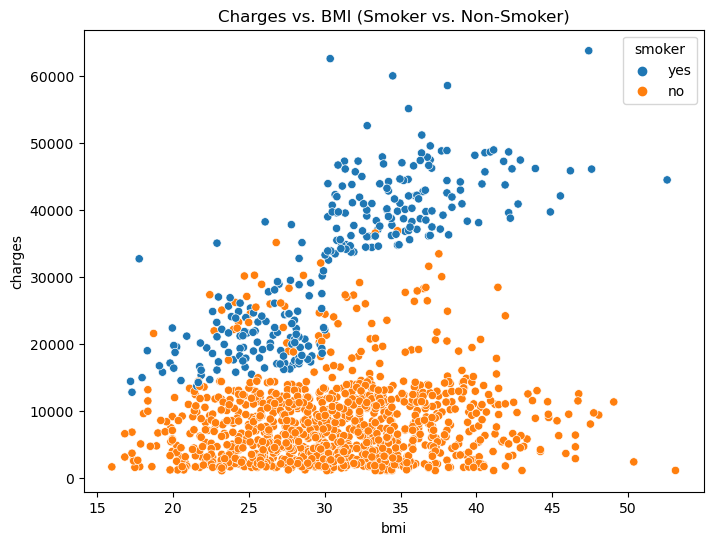

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Charges vs. BMI (Smoker vs. Non-Smoker)')
plt.show()

* Here we can see that age, bmi and smoker all three features are correlated with target variable charges. Charges increases with age and bmi. Smoker variable clearly divides data set into two parts.

<AxesSubplot:>

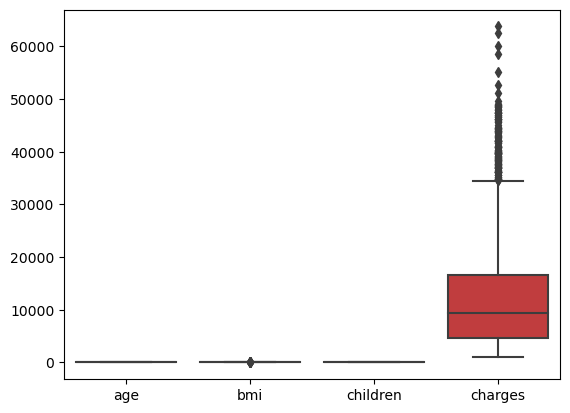

In [9]:
sns.boxplot(data=df)

### Winsorizing Technique -- Treatment of Outlier

In [10]:
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

34489.350562499996

In [11]:
df['charges'] = np.where(df['charges'] > upper_limit,upper_limit,df['charges']) # upper limit

<AxesSubplot:>

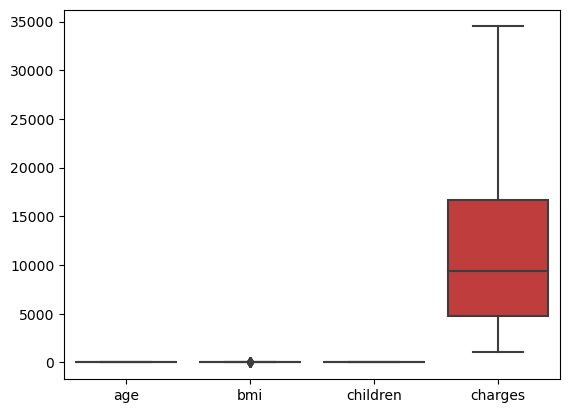

In [12]:
sns.boxplot(data=df)

# 5. Breaking Data into Two Part
 * Quantitative Variable
 * Qualitative Variable
 


In [13]:
# Qualitative Variable
Quantitative_Variable = df[df.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620


In [14]:
Qualitative_Variable = df[df.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast


### Converting qualitative Variable into number

In [15]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


## Combining the data set 

In [16]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,sex,smoker,region,age,bmi,children,charges
0,0,1,3,19,27.900,0,16884.92400
1,1,0,2,18,33.770,1,1725.55230
2,1,0,2,28,33.000,3,4449.46200
3,1,0,1,33,22.705,0,21984.47061
4,1,0,1,32,28.880,0,3866.85520


# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [17]:
# Putting feature variable to X
X = Final_combined.drop('charges', axis= 1)

# Putting response variable to y
y = Final_combined[['charges']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=122)

In [18]:
train = pd.concat([y_train, X_train], axis=1)
train.head()

,charges,sex,smoker,region,age,bmi,children
939,9487.64420,1,0,2,53,29.48,0
792,2731.91220,0,0,0,22,23.18,0
341,13352.09980,1,0,1,62,30.02,0
164,5028.14660,1,0,1,37,29.64,0
340,18955.22017,0,0,3,24,27.60,0


# Correlation Matrix

In [19]:
train.corr()

,charges,sex,smoker,region,age,bmi,children
charges,1.000000,0.060994,0.774353,-0.022500,0.329184,0.157794,0.094924
sex,0.060994,1.000000,0.101001,0.002050,-0.047013,0.074495,0.031235
smoker,0.774353,0.101001,1.000000,0.006598,-0.017193,-0.000550,0.010185
region,-0.022500,0.002050,0.006598,1.000000,-0.021969,0.141457,0.040009
age,0.329184,-0.047013,-0.017193,-0.021969,1.000000,0.114483,0.080510
bmi,0.157794,0.074495,-0.000550,0.141457,0.114483,1.000000,0.016151
children,0.094924,0.031235,0.010185,0.040009,0.080510,0.016151,1.000000


<AxesSubplot:>

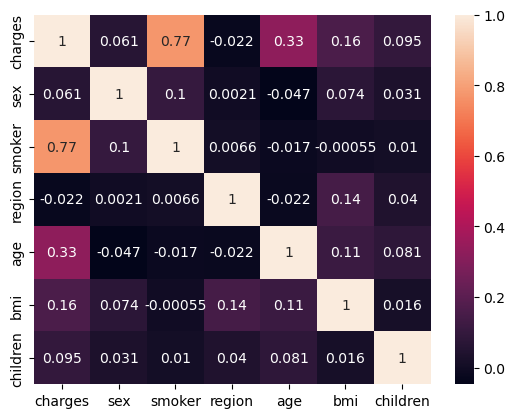

In [20]:
sns.heatmap(train.corr(),annot = True)

In [21]:
train.head()

,charges,sex,smoker,region,age,bmi,children
939,9487.64420,1,0,2,53,29.48,0
792,2731.91220,0,0,0,22,23.18,0
341,13352.09980,1,0,1,62,30.02,0
164,5028.14660,1,0,1,37,29.64,0
340,18955.22017,0,0,3,24,27.60,0


# Model Building

In [22]:
import statsmodels.formula.api as smf
model = smf.ols('charges ~ age + sex + bmi + children + smoker + region',data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     433.0
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.55e-265
Time:                        18:08:11   Log-Likelihood:                -9333.1
No. Observations:                 936   AIC:                         1.868e+04
Df Residuals:                     929   BIC:                         1.871e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7013.8167    969.015     -7.238      0.000   -8915.529   -5112.104
age          233.4471     12.378     18.860      0.000     209.155     257.739
sex         -284.1026    343.251     -0.828      0.408    -957.739     389.534
bmi          208.2391     28.123      7.405      0.000     153.047     263.431
children     508.3636    140.760      3.612      0.000     232.118     784.609
smoker      1.971e+04    427.175     46.138      0.000    1.89e+04    2.05e+04
region      -377.6824    156.928     -2.407      0.016    -685.657     -69.708
==============================================================================
Omnibus:                      377.946   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1371.493
Skew:                           1.966   Prob(JB):                    1.53e-298
Kurtosis:                       7.440   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [23]:
train['fitted_value']=model.fittedvalues #Predicted Value
train['residual']=model.resid  #Error
train

,charges,sex,smoker,region,age,bmi,children,fitted_value,residual
939,9487.64420,1,0,2,53,29.480,0,10458.302467,-970.658267
792,2731.91220,0,0,0,22,23.180,0,2949.002826,-217.090626
341,13352.09980,1,0,1,62,30.020,0,13049.457982,302.641818
164,5028.14660,1,0,1,37,29.640,0,7134.149313,-2106.002713
340,18955.22017,0,0,3,24,27.600,0,3203.266888,15751.953282
...,...,...,...,...,...,...,...,...,...
187,5325.65100,0,0,3,30,30.900,3,6816.229457,-1490.578457
876,26140.36030,0,0,3,49,27.100,1,9443.688707,16696.671593
1296,1708.92575,1,0,0,18,26.125,0,2344.376010,-635.450260
830,13393.75600,1,0,3,63,33.100,0,13168.916871,224.839129


# Linearity

<AxesSubplot:title={'center':'Charges vs Age'}, xlabel='age', ylabel='charges'>

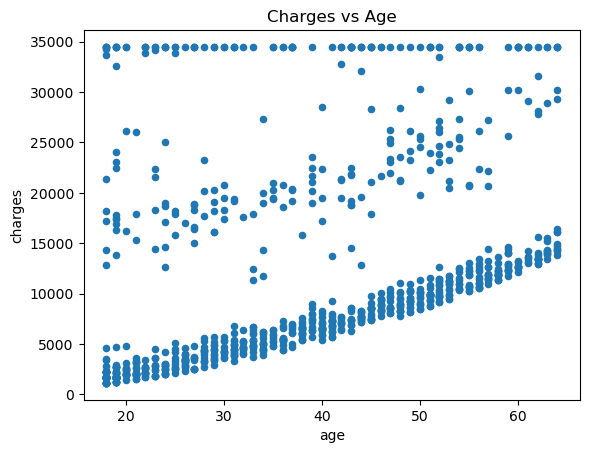

In [24]:
train.plot.scatter(x='age', y='charges', title='Charges vs Age')

# Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

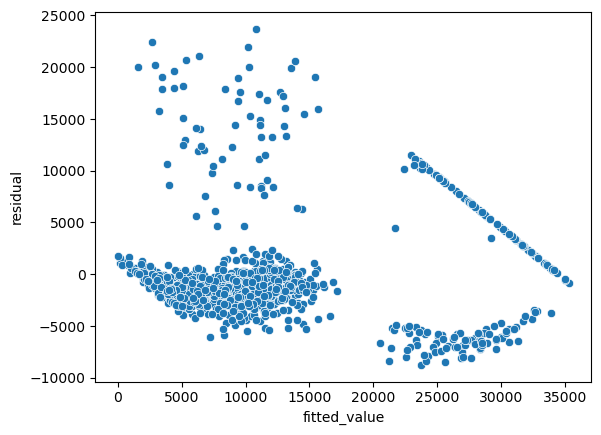

In [25]:
sns.scatterplot(x='fitted_value', y='residual',data=train)

# Normality

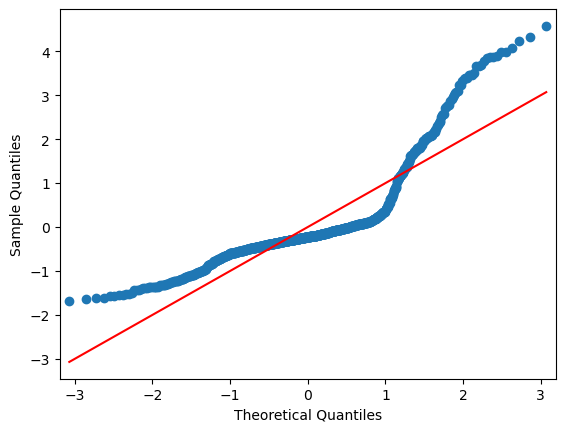

In [26]:
import statsmodels.api as sm
fig = sm.qqplot(train['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID 

<AxesSubplot:ylabel='Frequency'>

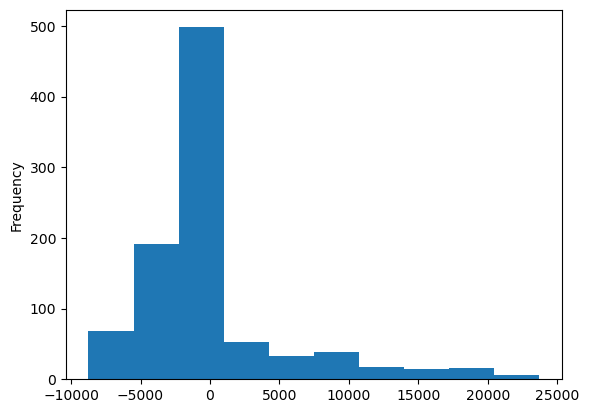

In [27]:
train['residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [28]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,sex,smoker,region,age,bmi,children,charges
1076,0,0,3,47,32.000,1,8551.34700
171,1,0,3,49,30.300,0,8116.68000
93,1,0,1,35,34.770,2,5729.00530
505,1,0,1,37,30.875,3,6796.86325
305,1,0,1,29,33.345,2,19442.35350


In [29]:
df_test['Prediction']=model.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,sex,smoker,region,age,bmi,children,charges,Prediction
1076,0,0,3,47,32.000,1,8551.34700,9997.166234
171,1,0,3,49,30.300,0,8116.68000,9317.587732
93,1,0,1,35,34.770,2,5729.00530,8752.249012
505,1,0,1,37,30.875,3,6796.86325,8916.415401
305,1,0,1,29,33.345,2,19442.35350,7054.825576


# Test

In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.charges, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.77


* Test data is good fit with 77% Accuracy
* Train data is also good fit with 73% Accuracy
* Model is good fit on Train dataset  & Performance of model on Test data is also good fit

# Conclusion

* initially we remove the outliers and made a barplot 
* here we can conclude that the accuracy of our model is 77% good fit so our model is good fit
* there is a linear relationship in this Model

* Charges increase with age, indicating higher healthcare costs for older individuals.
* Higher BMI correlates with increased charges, highlighting obesity's impact on medical expenses.
* Smokers face significantly higher charges, reflecting elevated health risks and associated costs.

* Implications:Insurance premiums should consider age, BMI, and smoking status for accurate pricing.
  Encouraging healthier lifestyles may reduce long-term healthcare costs and insurance charges.

* Limitations & Future Research:Other factors like specific medical conditions could influence charges and require further         exploration.
* Understanding these correlations is vital for precise insurance pricing and promoting healthier behaviors.

# Finish